SOurce : https://github.com/Amolrakhunde/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Amol.ipynb

In [ ]:
#importing required libraries for data analysis
import pandas as pd
import numpy as np
from numpy import math

#importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [ ]:
#check for any duplicates
len(df[df.duplicated()])

0

In [ ]:
df.rename(columns={'default.payment.next.month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

# We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.



##EDA (EXPLORATORY DATA ANALISIS)

<Axes: xlabel='IsDefaulter', ylabel='count'>

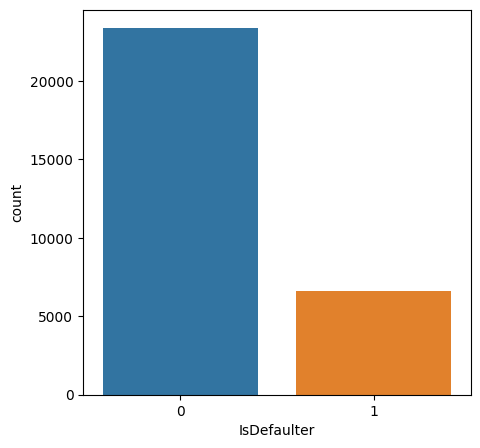

In [ ]:
#cek defaulter
#  (1=yes, 0=no)
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df)

Both classes are not in proportion that is we have imbalanced dataset.

<Axes: xlabel='SEX', ylabel='count'>

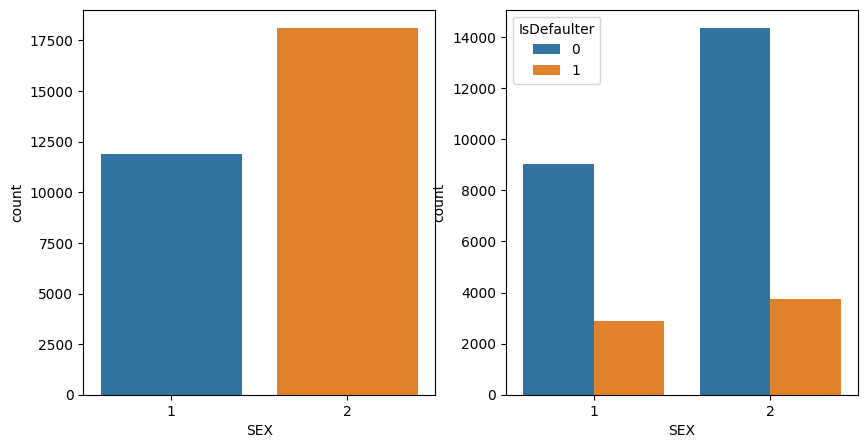

In [ ]:
#count plot for Sex and with respect to IsDefaulter
# Gender: 1 = male; 2 = female
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)

Banyak female yang defaulter no lebih banyak dari male, namun untuk yes defaulter selisih tidak terlalu jauh

In [ ]:
 # Education: 1 = graduate school; 2 = university; 3 = high school; 4 = others
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
#replace values with 5, 6 and 0 to Others
df.EDUCATION = df.EDUCATION.replace({5: 4, 6: 4,0: 4})

<Axes: xlabel='EDUCATION', ylabel='count'>

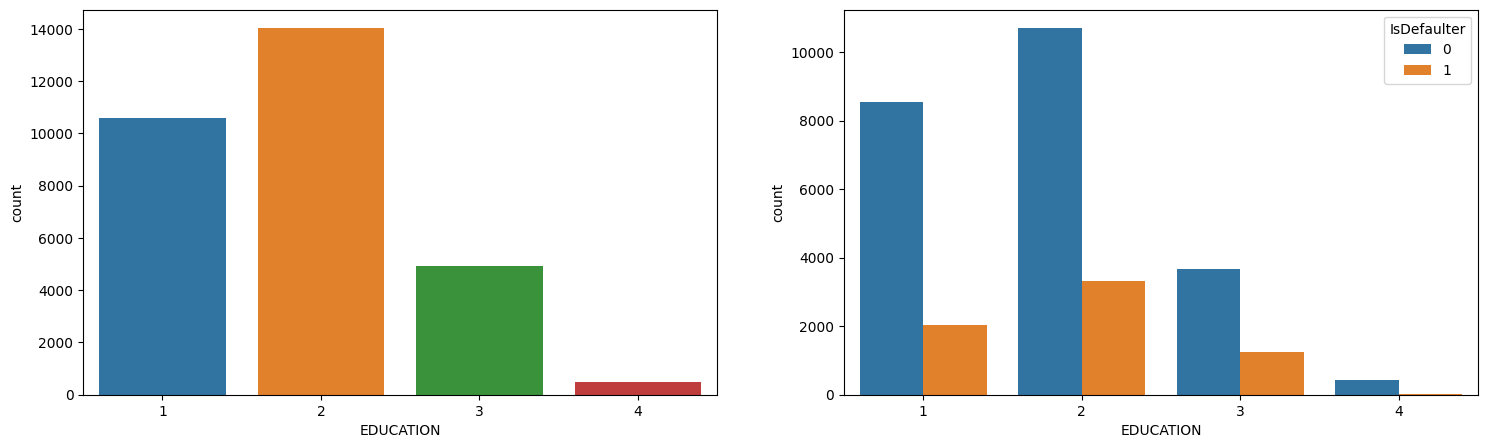

In [ ]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = df)

In [ ]:
#Marriage
#category wise values
# 1 = married; 2 = single; 3 = others
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
#replace 0 with Others
df.MARRIAGE = df.MARRIAGE.replace({0: 3})

<Axes: xlabel='MARRIAGE', ylabel='count'>

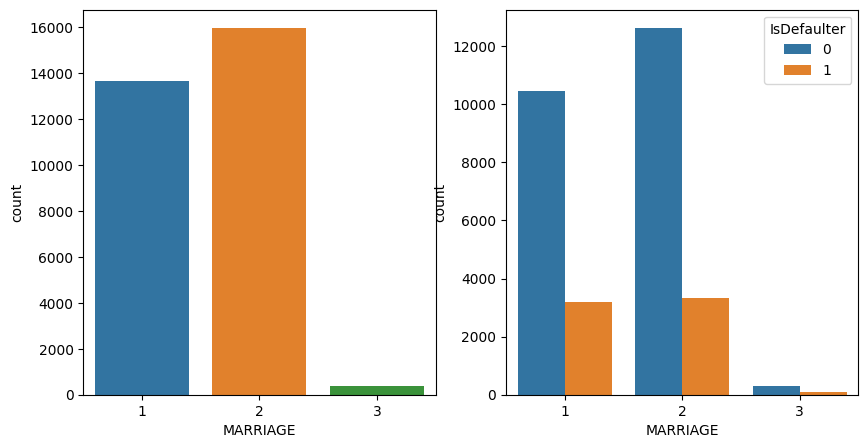

In [ ]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)

<Axes: xlabel='AGE', ylabel='count'>

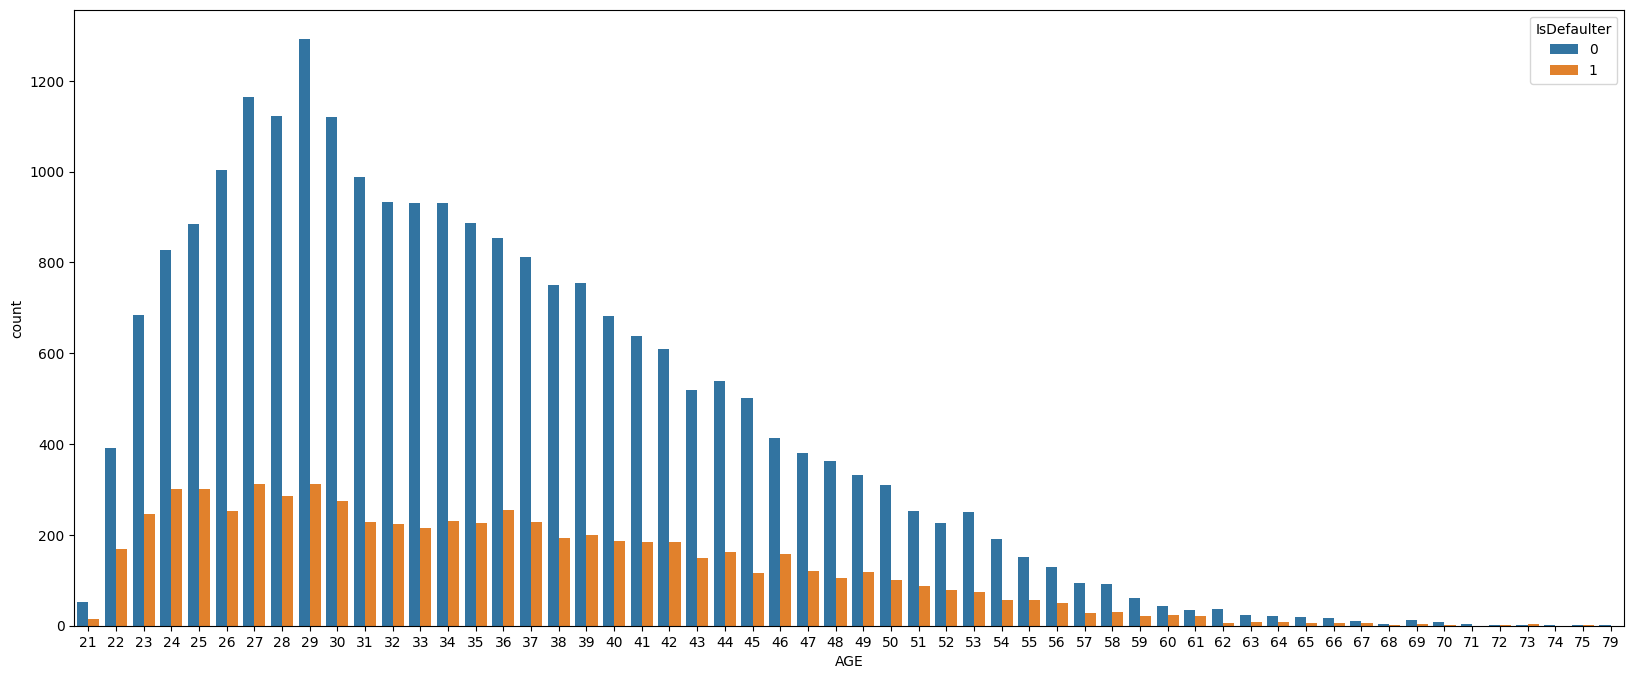

In [ ]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

##LABEL ENCODING

In [ ]:
#label encoding
encoders_nums = {"SEX":{2:0,"Male":1}, "IsDefaulter":{"Yes":1, "No":0}} #female change from 2 to 0

df = df.replace(encoders_nums)

In [ ]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0   1    20000.0    0          2         1   24         2        2       -1   
1   2   120000.0    0          2         2   26        -1        2        0   
2   3    90000.0    0          2         2   34         0        0        0   
3   4    50000.0    0          2         1   37         0        0        0   
4   5    50000.0    1          2         1   57        -1        0       -1   

   PAY_JUN  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  \
0       -1  ...           0.0           0.0           0.0           0.0   
1        0  ...        3272.0        3455.0        3261.0           0.0   
2        0  ...       14331.0       14948.0       15549.0        1518.0   
3        0  ...       28314.0       28959.0       29547.0        2000.0   
4        0  ...       20940.0       19146.0       19131.0        2000.0   

   PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  \
0        689.0          0.0          0.0          0.0          0.0   
1       1000.0       1000.0       1000.0          0.0       2000.0   
2       1500.0       1000.0       1000.0       1000.0       5000.0   
3       2019.0       1200.0       1100.0       1069.0       1000.0   
4      36681.0      10000.0       9000.0        689.0        679.0   

   IsDefaulter  
0            1  
1            1  
2            0  
3            0  
4            0  

[5 rows x 25 columns]

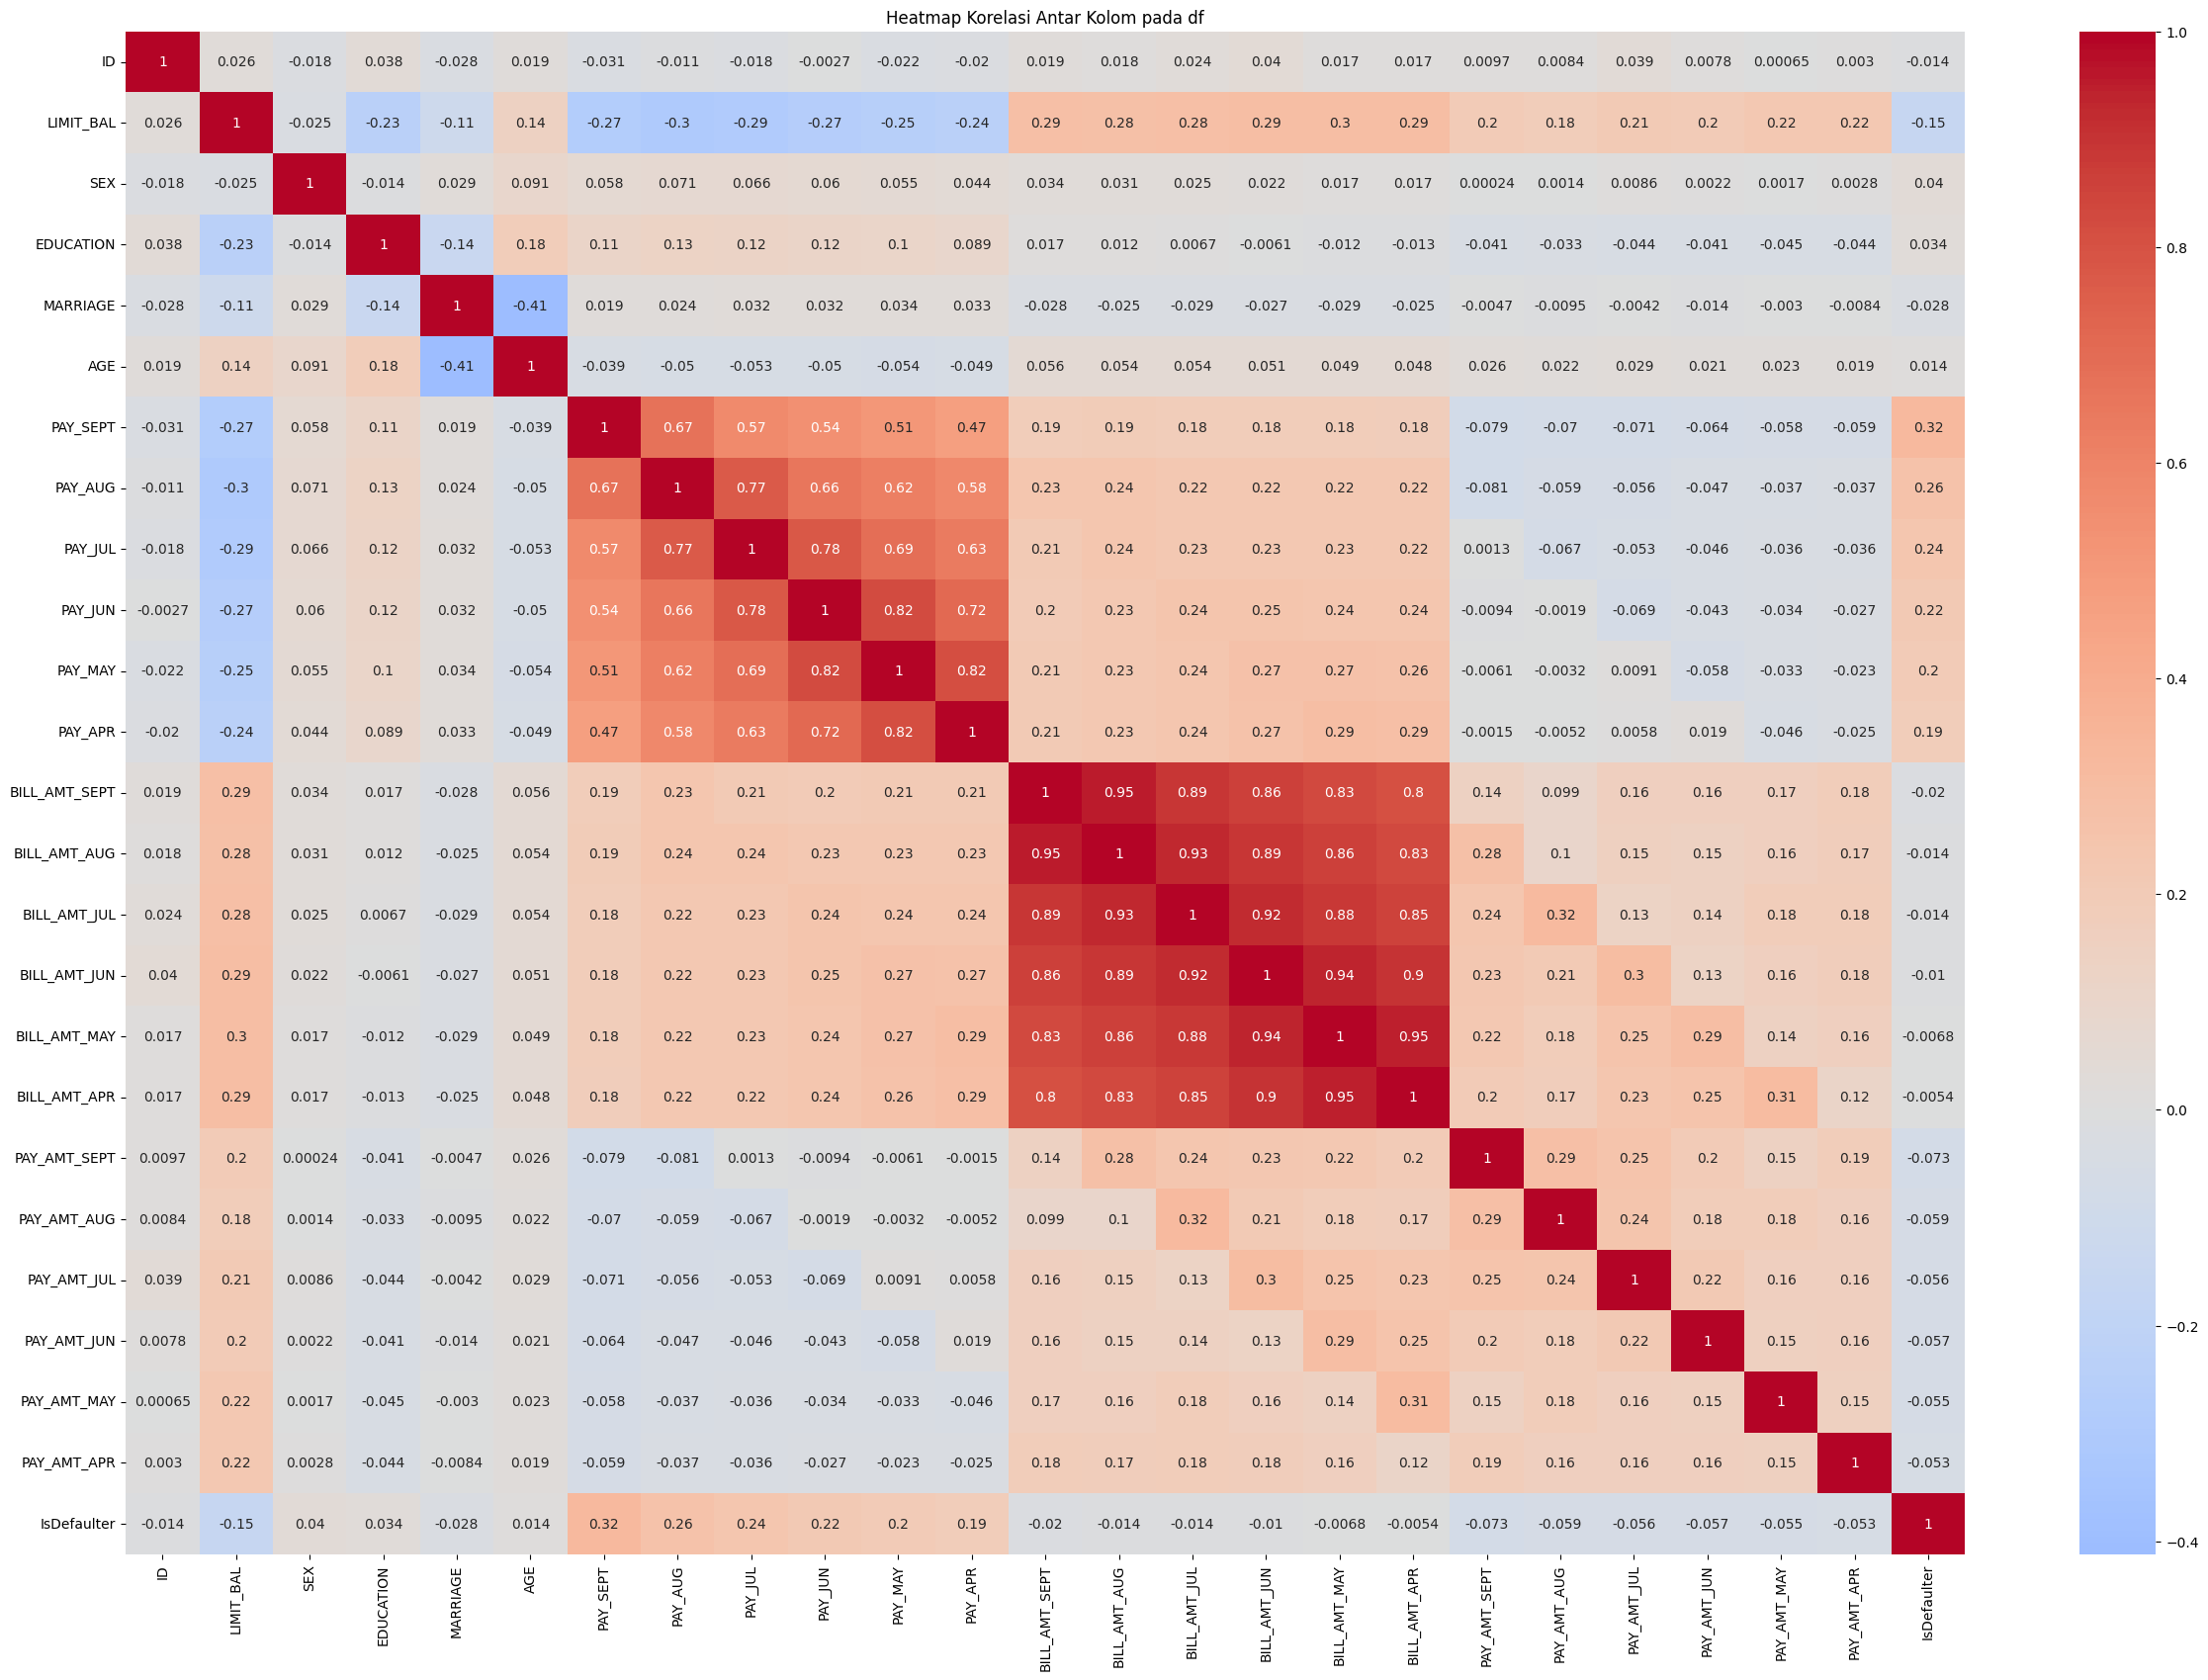

In [ ]:
correlation_matrix = df.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Antar Kolom pada df')
plt.show()

##One Hot Encoding

In [ ]:
#creat dummy variables
df = pd.get_dummies(df, columns = ['EDUCATION', 'MARRIAGE'])

In [ ]:
df.shape

(30000, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             30000 non-null  int64  
 1   LIMIT_BAL      30000 non-null  float64
 2   SEX            30000 non-null  int64  
 3   AGE            30000 non-null  int64  
 4   PAY_SEPT       30000 non-null  int64  
 5   PAY_AUG        30000 non-null  int64  
 6   PAY_JUL        30000 non-null  int64  
 7   PAY_JUN        30000 non-null  int64  
 8   PAY_MAY        30000 non-null  int64  
 9   PAY_APR        30000 non-null  int64  
 10  BILL_AMT_SEPT  30000 non-null  float64
 11  BILL_AMT_AUG   30000 non-null  float64
 12  BILL_AMT_JUL   30000 non-null  float64
 13  BILL_AMT_JUN   30000 non-null  float64
 14  BILL_AMT_MAY   30000 non-null  float64
 15  BILL_AMT_APR   30000 non-null  float64
 16  PAY_AMT_SEPT   30000 non-null  float64
 17  PAY_AMT_AUG    30000 non-null  float64
 18  PAY_AM

In [ ]:
df.drop(['EDUCATION_4', 'MARRIAGE_3'], axis=1, inplace=True)

In [ ]:
df.shape

(30000, 28)

In [ ]:
#creating dummy variables by droping firs variable
df = pd.get_dummies(df, columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             30000 non-null  int64  
 1   LIMIT_BAL      30000 non-null  float64
 2   SEX            30000 non-null  int64  
 3   AGE            30000 non-null  int64  
 4   BILL_AMT_SEPT  30000 non-null  float64
 5   BILL_AMT_AUG   30000 non-null  float64
 6   BILL_AMT_JUL   30000 non-null  float64
 7   BILL_AMT_JUN   30000 non-null  float64
 8   BILL_AMT_MAY   30000 non-null  float64
 9   BILL_AMT_APR   30000 non-null  float64
 10  PAY_AMT_SEPT   30000 non-null  float64
 11  PAY_AMT_AUG    30000 non-null  float64
 12  PAY_AMT_JUL    30000 non-null  float64
 13  PAY_AMT_JUN    30000 non-null  float64
 14  PAY_AMT_MAY    30000 non-null  float64
 15  PAY_AMT_APR    30000 non-null  float64
 16  IsDefaulter    30000 non-null  int64  
 17  EDUCATION_1    30000 non-null  uint8  
 18  EDUCAT

In [ ]:
df.shape

(30000, 80)

In [ ]:
df.head()

ID  LIMIT_BAL  SEX  AGE  BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JUL  \
0   1    20000.0    0   24         3913.0        3102.0         689.0   
1   2   120000.0    0   26         2682.0        1725.0        2682.0   
2   3    90000.0    0   34        29239.0       14027.0       13559.0   
3   4    50000.0    0   37        46990.0       48233.0       49291.0   
4   5    50000.0    1   57         8617.0        5670.0       35835.0   

   BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  ...  PAY_MAY_8  PAY_APR_-1  \
0           0.0           0.0           0.0  ...          0           0   
1        3272.0        3455.0        3261.0  ...          0           0   
2       14331.0       14948.0       15549.0  ...          0           0   
3       28314.0       28959.0       29547.0  ...          0           0   
4       20940.0       19146.0       19131.0  ...          0           0   

   PAY_APR_0  PAY_APR_2  PAY_APR_3  PAY_APR_4  PAY_APR_5  PAY_APR_6  \
0          0          0          0          0          0          0   
1          0          1          0          0          0          0   
2          1          0          0          0          0          0   
3          1          0          0          0          0          0   
4          1          0          0          0          0          0   

   PAY_APR_7  PAY_APR_8  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 80 columns]

In [ ]:
df.shape

(30000, 80)

##Handling imbalance class

In [ ]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [ ]:
#creating new dataframe from balanced dataset after SMOTE

balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))


In [ ]:
#adding target variable to new created dataframe
balanced_df['IsDefaulter'] = y_smote

<Axes: xlabel='IsDefaulter', ylabel='count'>

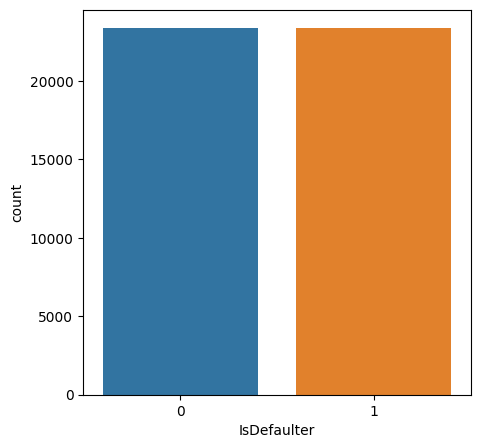

In [ ]:
#check for class imbalance
plt.figure(figsize=(5,5))
sns.countplot(x='IsDefaulter', data=balanced_df)

In [ ]:
#shape of balanced dataframe
balanced_df.shape

(46728, 80)

In [ ]:
balanced_df.drop('ID', axis = 1, inplace = True)

In [ ]:
balanced_df.head()

LIMIT_BAL  SEX  AGE  BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JUL  \
0    20000.0    0   24         3913.0        3102.0         689.0   
1   120000.0    0   26         2682.0        1725.0        2682.0   
2    90000.0    0   34        29239.0       14027.0       13559.0   
3    50000.0    0   37        46990.0       48233.0       49291.0   
4    50000.0    1   57         8617.0        5670.0       35835.0   

   BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  ...  PAY_APR_-1  \
0           0.0           0.0           0.0           0.0  ...           0   
1        3272.0        3455.0        3261.0           0.0  ...           0   
2       14331.0       14948.0       15549.0        1518.0  ...           0   
3       28314.0       28959.0       29547.0        2000.0  ...           0   
4       20940.0       19146.0       19131.0        2000.0  ...           0   

   PAY_APR_0  PAY_APR_2  PAY_APR_3  PAY_APR_4  PAY_APR_5  PAY_APR_6  \
0          0          0          0          0          0          0   
1          0          1          0          0          0          0   
2          1          0          0          0          0          0   
3          1          0          0          0          0          0   
4          1          0          0          0          0          0   

   PAY_APR_7  PAY_APR_8  IsDefaulter  
0          0          0            1  
1          0          0            1  
2          0          0            0  
3          0          0            0  
4          0          0            0  

[5 rows x 79 columns]

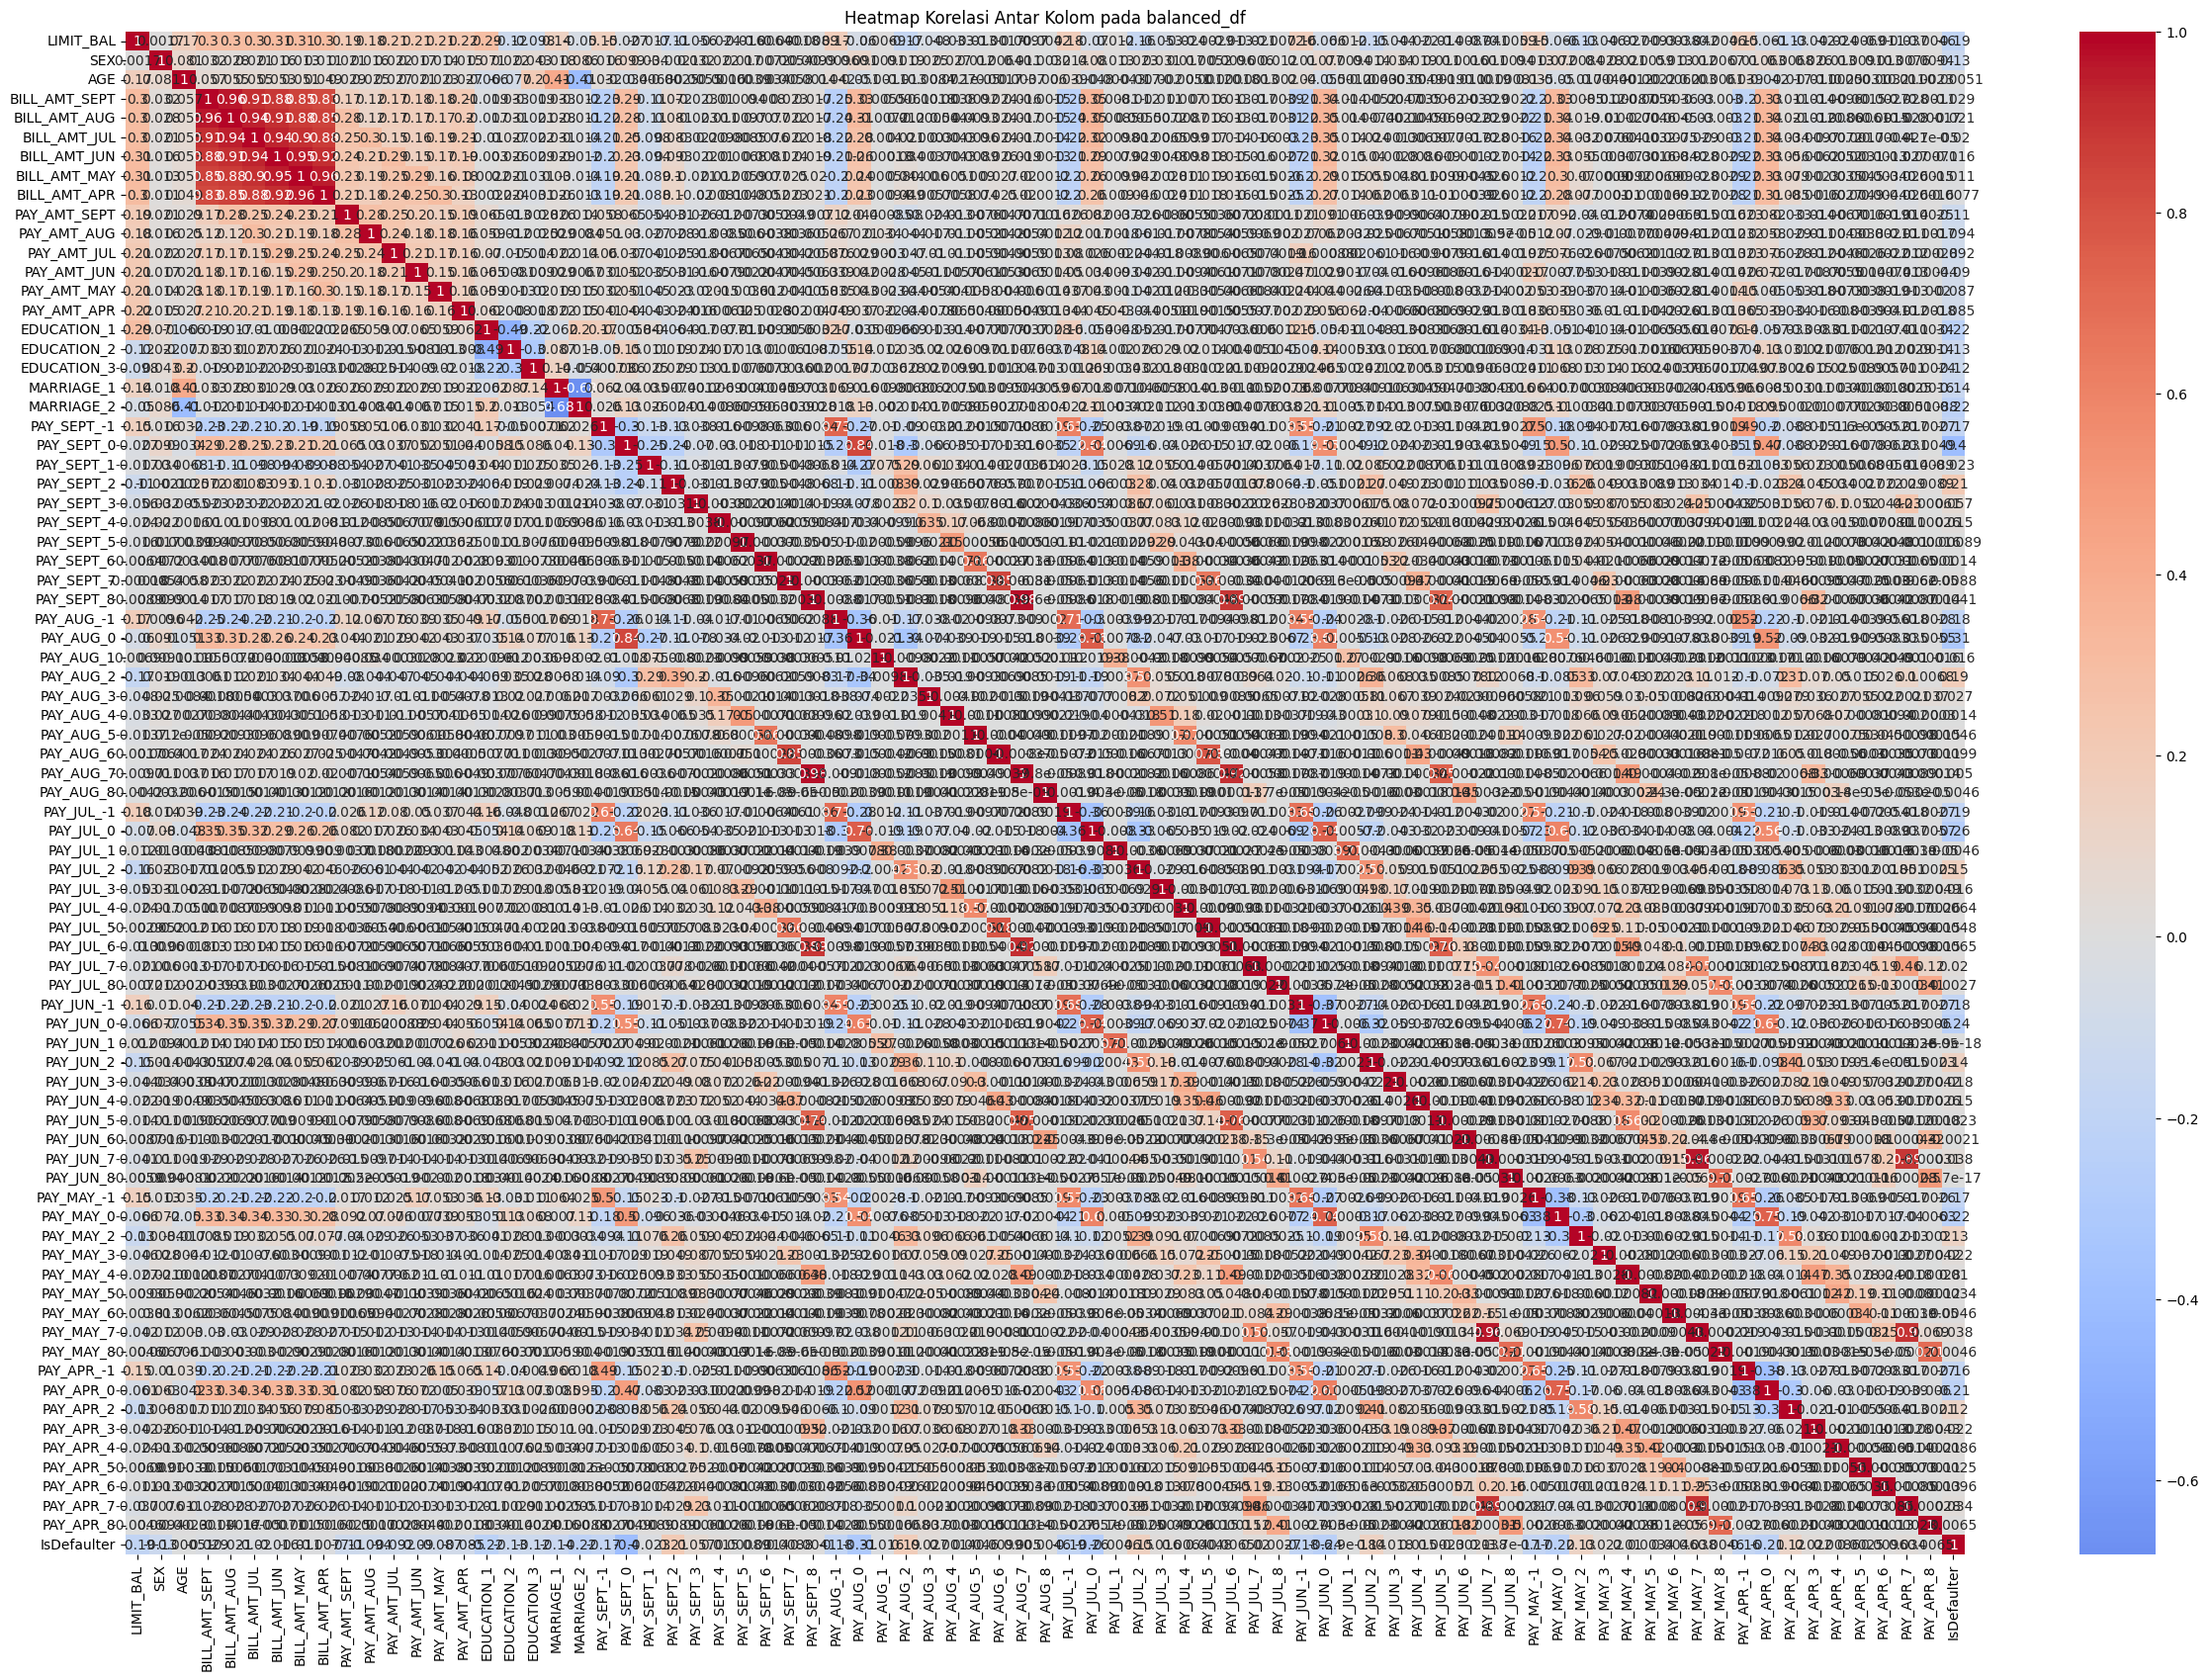

In [ ]:
correlation_matrix = balanced_df.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Antar Kolom pada balanced_df')
plt.show()

In [ ]:
#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']
print('X shape : ',X.shape)
print('y shape : ',y.shape)

X shape :  (46728, 78)
y shape :  (46728,)


##Data Transformation

In [ ]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

##Train Test Splitting

In [ ]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)
print('X train shape : ',X_train.shape)
print('X test shape : ',X_test.shape)

X train shape :  (37382, 78)
X test shape :  (9346, 78)


##Baseline Model

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [ ]:
logi = LogisticRegression()
logi.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_logi = logi.predict(X_test)
y_train_pred_logi = logi.predict(X_train)

In [ ]:
#getting all scores for logistic regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.826
The accuracy on test data is  0.831
The precision on test data is  0.794
The recall on test data is  0.857
The f1 on test data is  0.824
The roc_score on test data is  0.832


[[4053  620]
 [ 964 3709]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

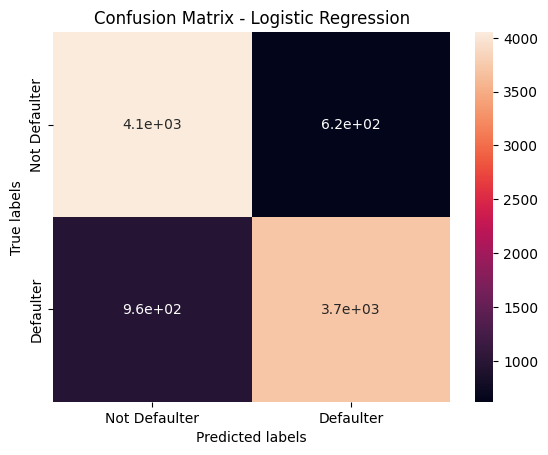

In [ ]:
# Get the confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

###Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [ ]:
len(y_pred_rfc)

9346

In [ ]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on test data is  0.869
The precision on test data is  0.836
The recall on test data is  0.894
The f1 on test data is  0.864
The roc_score on test data is  0.87


[[4211  462]
 [ 765 3908]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

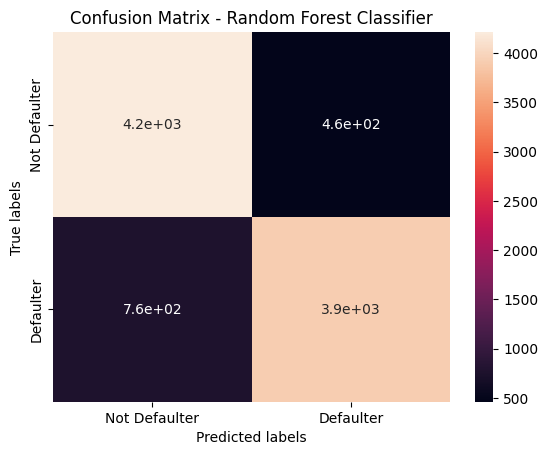

In [ ]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##Model Comparison

In [ ]:
all_lassifiers = ['Logistic Regression', 'Random Forest']
all_train_accuracy = [train_accuracy_logi, train_accuracy_rfc]
all_test_accuracy = [accuracy_logi, accuracy_rfc]
all_precision_score = [precision_score_logi, precision_score_rfc]
all_recall_score = [recall_score_logi, recall_score_rfc]
all_f1_score = [f1_score_logi, f1_score_rfc]
all_auc_score = [roc_score_logi, roc_score_rfc]

In [ ]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [ ]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

Classifier  Train Accuracy  Test Accuracy  Precision  Recall  \
1        Random Forest           0.999          0.869      0.836   0.894   
0  Logistic Regression           0.826          0.831      0.794   0.857   

   F1 Score    AUC  
1     0.864  0.870  
0     0.824  0.832



```
# This is formatted as code
```

##Combined ROC curve for all the models

In [ ]:
#importing roc curve
from sklearn.metrics import roc_curve

In [ ]:
#probabilty prediction of y for all model
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]

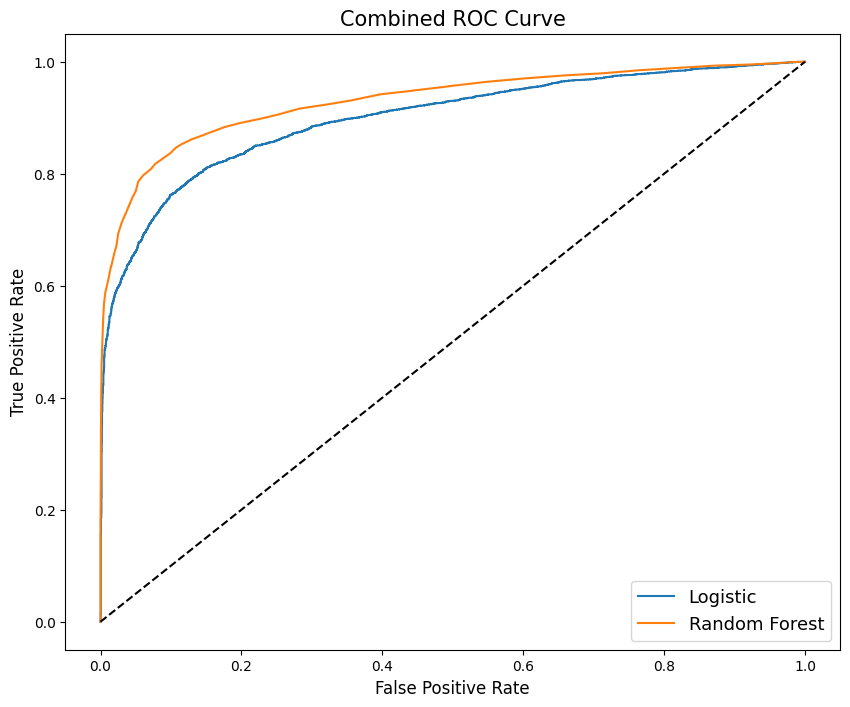

In [ ]:
fig = plt.figure(figsize=(10,8))

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_logi)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_rfc, tpr_rfc)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Random Forest"], prop={'size':13}, loc='lower right' )


##Feature Importance On Random Forest Model

In [ ]:
features = list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter')

In [ ]:
feature_importances_rfc = rfc.feature_importances_

In [ ]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

In [ ]:
feature_importances_rfc_df.sort_values(ascending=False)[0:15]

PAY_SEPT_0       0.071003
LIMIT_BAL        0.052296
BILL_AMT_SEPT    0.046956
BILL_AMT_JUN     0.043547
BILL_AMT_AUG     0.043103
BILL_AMT_JUL     0.042281
AGE              0.041858
PAY_AMT_AUG      0.040596
PAY_AMT_SEPT     0.040576
BILL_AMT_MAY     0.039127
BILL_AMT_APR     0.038637
PAY_AMT_JUL      0.038542
PAY_AMT_APR      0.034787
PAY_AMT_MAY      0.034341
PAY_AMT_JUN      0.033903
dtype: float64

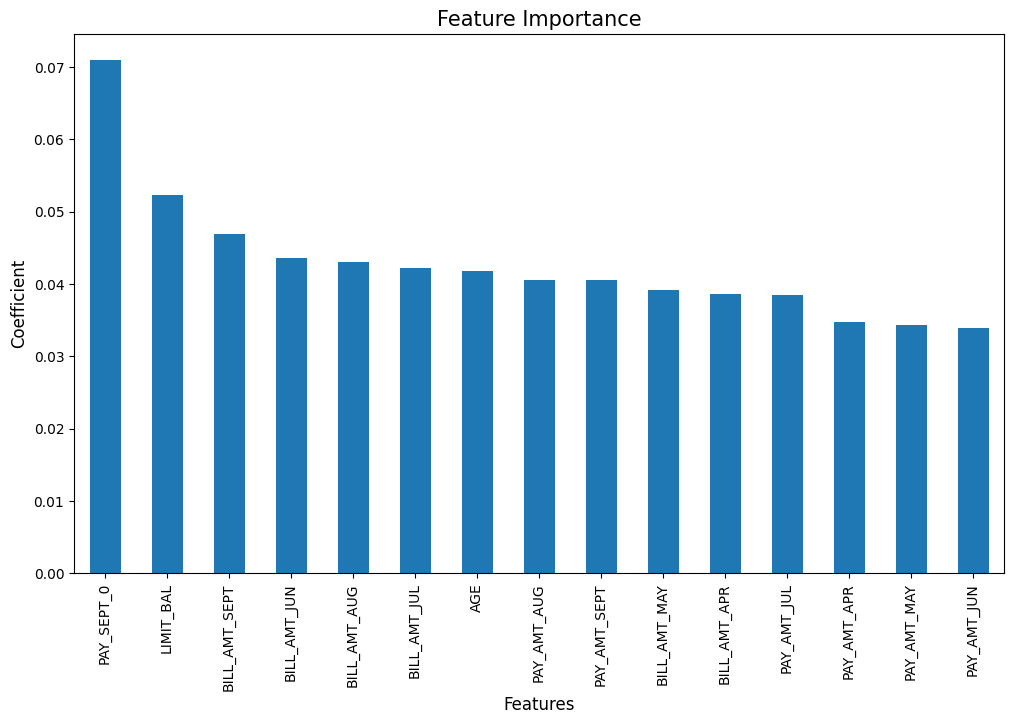

In [ ]:
fig = plt.figure(figsize=(12,7))
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

# #Cross Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

##Logistic Regression

In [ ]:
# penalty in Logistic Regression Classifier
penalties = ['l1','l2', 'elasticnet', 'none']

# hyperparameter C
C= [0.0001, 0.001, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,
              'max_iter' : [100, 1000,2500, 5000],
              'C' : C }

In [ ]:
# Create an instance of the Logistic Regression
logi = LogisticRegression()

# Grid search
logi_grid = GridSearchCV(estimator=logi,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
logi_grid.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 5,
                               10],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc', verbose=3)

In [ ]:
logi_grid.best_estimator_

LogisticRegression(C=0.1)

In [ ]:
logi_grid.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

In [ ]:
logi_optimal_model = logi_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_logi_grid = logi_optimal_model.predict(X_test)
y_train_pred_logi_grid = logi_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Logistic Regression after CV and Hyperparameter Tunning
train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 3)
accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 3)
precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 3)
recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 3)
f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 3)
auc_logi_grid = round(roc_auc_score(y_pred_logi_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi_grid)
print("The accuracy on test data is ", accuracy_logi_grid)
print("The precision on test data is ", precision_score_logi_grid)
print("The recall on test data is ", recall_score_logi_grid)
print("The f1 on test data is ", f1_score_logi_grid)
print("The auc on test data is ", auc_logi_grid)

The accuracy on train data is  0.826
The accuracy on test data is  0.83
The precision on test data is  0.794
The recall on test data is  0.856
The f1 on test data is  0.824
The auc on test data is  0.832


In [ ]:
# Get the confusion matrices for train and test
train_cm_logi_grid = confusion_matrix(y_train,y_train_pred_logi_grid)
test_cm_logi_grid = confusion_matrix(y_test,y_pred_logi_grid )

In [ ]:
train_cm_logi_grid

array([[16210,  2481],
       [ 4014, 14677]])

In [ ]:
test_cm_logi_grid

array([[4048,  625],
       [ 963, 3710]])

##Random Forest

In [ ]:
# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

# Grid search
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.7s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.4s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.6s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.4s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   6.8s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.3s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   6.9s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.2s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [ ]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=150)

In [ ]:
rfc_grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 150}

In [ ]:
rfc_optimal_model = rfc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
len(y_pred_rfc_grid)

9346

In [ ]:
#getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on test data is ", accuracy_rfc_grid)
print("The precision on test data is ", precision_score_rfc_grid)
print("The recall on test data is ", recall_score_rfc_grid)
print("The f1 on test data is ", f1_score_rfc_grid)
print("The auc on test data is ", auc_rfc_grid)

The accuracy on train data is  0.843
The accuracy on test data is  0.837
The precision on test data is  0.799
The recall on test data is  0.864
The f1 on test data is  0.83
The auc on test data is  0.838


In [ ]:
# Get the confusion matrices for train and test
train_cm_rfc_grid = confusion_matrix(y_train,y_train_pred_rfc_grid)
test_cm_rfc_grid = confusion_matrix(y_test,y_pred_rfc_grid )

In [ ]:
train_cm_rfc_grid

array([[16588,  2103],
       [ 3771, 14920]])

In [ ]:
test_cm_rfc_grid

array([[4085,  588],
       [ 940, 3733]])

In [ ]:
grid_classifiers = ['Optimal Logistic Regression', 'Optimal Random Forest']
grid_train_accuracy = [train_accuracy_logi_grid, train_accuracy_rfc_grid]
grid_test_accuracy = [accuracy_logi_grid, accuracy_rfc_grid]
grid_precision_score = [precision_score_logi_grid, precision_score_rfc_grid]
grid_recall_score = [recall_score_logi_grid, recall_score_rfc_grid]
grid_f1_score = [f1_score_logi_grid, f1_score_rfc_grid]
grid_auc_score = [auc_logi_grid, auc_rfc_grid]

In [ ]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score , 'AUC': grid_auc_score})

In [ ]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()

In [ ]:
all_comparision_df.drop('index', axis=1, inplace=True)

In [ ]:
all_comparision_df.sort_values('AUC', axis=0, ascending=False, inplace=True)

In [ ]:
all_comparision_df

Classifier  Train Accuracy  Test Accuracy  Precision  \
1                Random Forest           1.000          0.869      0.834   
3        Optimal Random Forest           0.843          0.837      0.799   
0          Logistic Regression           0.827          0.833      0.798   
2  Optimal Logistic Regression           0.827          0.832      0.798   

   Recall  F1 Score    AUC  
1   0.897     0.864  0.871  
3   0.864     0.830  0.838  
0   0.858     0.827  0.835  
2   0.857     0.826  0.834

In [ ]:
X_test[0]

array([ 1.39206112, -0.69150043, -0.61444075,  1.44625488,  1.52414424,
       -0.50065003, -0.51585507, -0.65745507, -0.57485088,  0.37401533,
        0.26098513, -0.15674458, -0.30324745,  0.03169301, -0.12280421,
       -0.6067586 ,  1.23326082, -0.36686215,  1.28799377, -0.8761601 ,
       -0.40659051,  1.34700821, -0.32624126, -0.32948369, -0.09419996,
       -0.04167069, -0.02359494, -0.01534472, -0.01463046, -0.02016864,
       -0.42405334,  1.19818732, -0.02448615, -0.39988332, -0.08774268,
       -0.04654167, -0.0231365 , -0.01668182, -0.0206928 , -0.00462611,
       -0.41954801,  1.15794974, -0.00925252, -0.38297682, -0.07451154,
       -0.04089041, -0.02170326, -0.0226688 , -0.02776707, -0.00801283,
       -0.40666198,  1.08997715, -0.00654238, -0.34623301, -0.06473465,
       -0.03982643, -0.02776707, -0.01034474, -0.04945318, -0.00654238,
       -0.40171745,  1.04711992, -0.31540823, -0.06506717, -0.04343722,
       -0.01907721, -0.00925252, -0.04901641, -0.00462611,  2.41

In [ ]:
X_val = [120000.00, ]